In [1]:
print("hello world")
# alt + Enter 

hello world


In [5]:
%pip --version

pip 23.1.2 from c:\Users\Harish Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path= os.path.join(curr_dir,"datasets","Valid")


Current Dir  c:\Users\Public\datasets


In [11]:
import tensorflow as tf


In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [12]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [14]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Harish Reddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 626ms/step - accuracy: 0.3966 - loss: 1.5672 - val_accuracy: 0.6533 - val_loss: 0.6765
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 611ms/step - accuracy: 0.6587 - loss: 0.6822 - val_accuracy: 0.6833 - val_loss: 0.5952
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 605ms/step - accuracy: 0.7497 - loss: 0.5533 - val_accuracy: 0.7233 - val_loss: 0.7095
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 600ms/step - accuracy: 0.8435 - loss: 0.4261 - val_accuracy: 0.8700 - val_loss: 0.3051
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 595ms/step - accuracy: 0.8999 - loss: 0.2686 - val_accuracy: 0.8467 - val_loss: 0.3982
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 594ms/step - accuracy: 0.9215 - loss: 0.2416 - val_accuracy: 0.8567 - val_loss: 0.3987
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 597ms/step - accuracy: 0.9298 - loss: 0.1860 - val_accuracy: 0.9367 - val_loss: 0.1546
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 606ms/step - accuracy: 0.9693 - loss: 0.0951 - val_accu

In [27]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.9750 - loss: 0.0756
Training accuracy: 0.9722222089767456


In [28]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.8821 - loss: 0.2602
Validation accuracy: 0.9133333563804626


In [29]:
cnn.save('trained_plant_disease_model.keras')

In [30]:
training_history.history

{'accuracy': [0.46666666865348816,
  0.6833333373069763,
  0.753333330154419,
  0.8455555438995361,
  0.8999999761581421,
  0.9355555772781372,
  0.9388889074325562,
  0.9577777981758118,
  0.9577777981758118,
  0.9422222375869751],
 'loss': [1.1894797086715698,
  0.6505014300346375,
  0.5407142639160156,
  0.3834174573421478,
  0.2628100514411926,
  0.19500161707401276,
  0.17733554542064667,
  0.11320116370916367,
  0.11026745289564133,
  0.14007455110549927],
 'val_accuracy': [0.653333306312561,
  0.6833333373069763,
  0.7233333587646484,
  0.8700000047683716,
  0.846666693687439,
  0.8566666841506958,
  0.9366666674613953,
  0.9333333373069763,
  0.8866666555404663,
  0.9133333563804626],
 'val_loss': [0.6764534711837769,
  0.5951986908912659,
  0.709536612033844,
  0.30514803528785706,
  0.39822855591773987,
  0.3986563980579376,
  0.15455150604248047,
  0.17774784564971924,
  0.3789293169975281,
  0.19712260365486145]}

<function matplotlib.pyplot.show(close=None, block=None)>

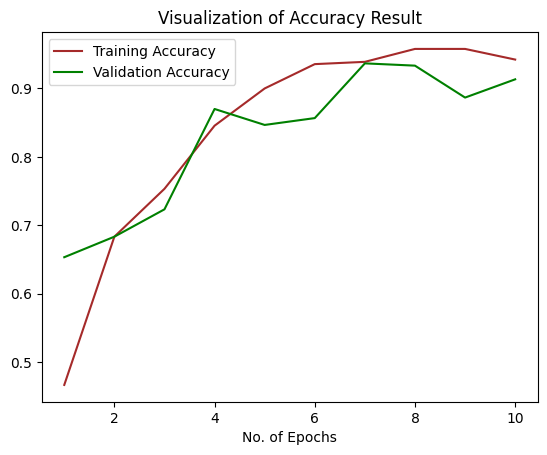

In [31]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show

